In [1]:
from core.activations import Fun
from core.losses import LossFun
from core.mlp import MLP

In [6]:
from plots.loss import make_loss_plot
from plots.classification.boundary import plot_decision_boundary
from data.classification import get_classification_data, Size, ClassificationType
from plots.weights import make_weights_avg_plot, make_weights_heatmap
from utils.split import split_data


X, y = get_classification_data(
    class_type=ClassificationType.NOISY_XOR, class_size=Size._100
)
X_test, y_test = get_classification_data(
    class_type=ClassificationType.NOISY_XOR, class_size=Size._100, test=True
)
X_train, y_train, X_val, y_val, _, _ = split_data(X, y)

layer_sizes = [2, 32, 32, y.shape[1]]
activations = [Fun.ReLU, Fun.ReLU, Fun.Linear]
mlp = MLP(layer_sizes, activations, loss_fun=LossFun.MSE)


epochs = 5000
learning_rate = 0.1
train_loss, val_loss, weights = mlp.train(X_train, y_train, X_val, y_val, epochs=epochs, learning_rate=learning_rate)


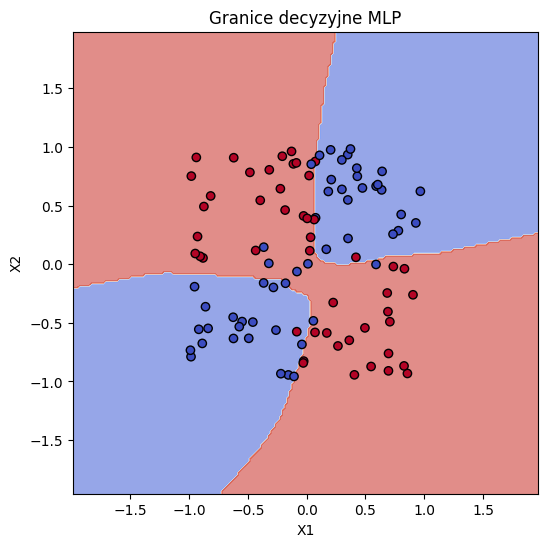

In [7]:
plot_decision_boundary(mlp, X_test, y_test)

In [8]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = mlp.forward(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_pred = np.eye(y_pred.shape[1])[y_pred_class]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        52
           1       0.85      0.96      0.90        48

   micro avg       0.90      0.90      0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.91      0.90      0.90       100
 samples avg       0.90      0.90      0.90       100



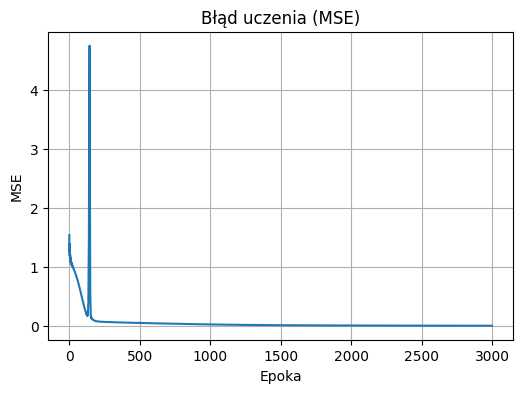

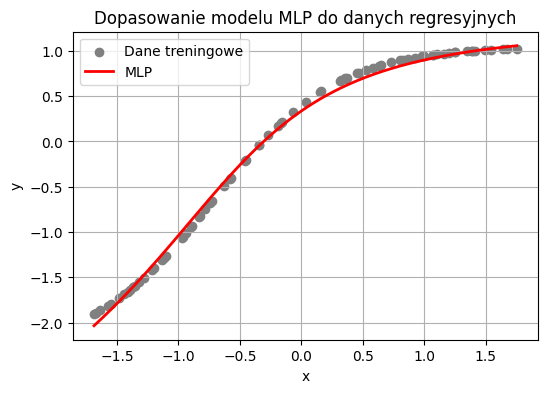

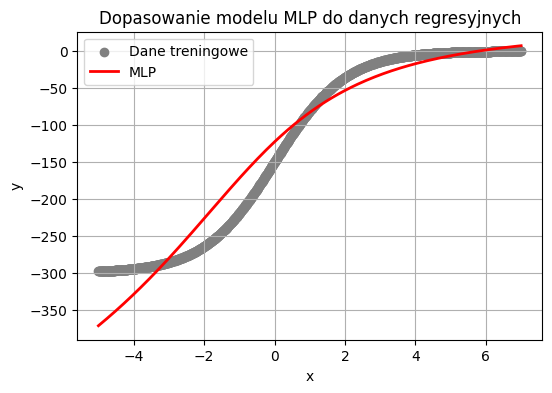

In [11]:
from data.regression import get_regression_data, Size, RegressionType
from utils.normalize import normalize
from plots.loss import make_loss_plot
from plots.regression.fit import make_fit_plot

np.random.seed(42)

X, Y = get_regression_data(class_type=RegressionType.ACTIVATION, class_size=Size._1000)
X_test, Y_test = get_regression_data(class_type=RegressionType.ACTIVATION, class_size=Size._1000, test=True)

Xn, X_mean, X_std = normalize(X)
Yn, Y_mean, Y_std = normalize(Y)
X_train, y_train, X_val, y_val, _, _ = split_data(Xn, Yn)

layer_sizes = [1, 64, 64, 1]
activations = [Fun.Sigmoid, Fun.Sigmoid, Fun.Linear]
mlp = MLP(layer_sizes, activations, loss_fun=LossFun.MSE)

epochs = 3000
learning_rate = 0.1
train_loss, val_loss, weights = mlp.train(X_train, y_train, X_val, y_val, epochs=epochs, learning_rate=learning_rate)

make_loss_plot(val_loss)
make_fit_plot(X_val, y_val, mlp)
make_fit_plot(X_test, Y_test, mlp)